In [2]:
print('Note')

import numpy as np

"""

Pandas tips and tricks



"""
print('')

Note



In [3]:
import pandas as pd
import numpy as np
import IPython
import sys

print(sys.version, '\n')
print('{}: {}'.format('pandas', pd.__version__))
print('{}: {}'.format('numpy', np.__version__))
print('{}: {}'.format('IPython', IPython.__version__))

3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 03:03:55) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)] 

pandas: 0.23.1
numpy: 1.14.5
IPython: 6.4.0


In [4]:
class display_df(object):
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)
    
def display_command(command):
    print('> {}:\n {}\n'.format(command, eval(command)))

In [5]:
def make_toy_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_toy_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


## DataFrame and Series

DataFrame and Series are the major structures in Pandas

DataFrame is like a table, and Series is each column

or we can say DataFrame is a dictionary of Series

In [6]:
df = make_toy_df('ABC', range(5))
print('type of {}: {}'.format('df', type(df)))
df

type of df: <class 'pandas.core.frame.DataFrame'>


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4


In [7]:
print('type of {}: {}'.format("df['A']", type(df['A'])))
df['A']

type of df['A']: <class 'pandas.core.series.Series'>


0    A0
1    A1
2    A2
3    A3
4    A4
Name: A, dtype: object

In [8]:
## dictionary-style & attribute-style to access a column
print(df['A'])
print(df.A)
print(df['A'] is df.A)

0    A0
1    A1
2    A2
3    A3
4    A4
Name: A, dtype: object
0    A0
1    A1
2    A2
3    A3
4    A4
Name: A, dtype: object
True


In [9]:
## add a new column
df['shape'] = list(range(df.shape[0]))

display_command("df['A'] is df.A")
display_command("df['shape'] is df.shape")  # if already have this method
df

> df['A'] is df.A:
 True

> df['shape'] is df.shape:
 False



,A,B,C,shape
0,A0,B0,C0,0
1,A1,B1,C1,1
2,A2,B2,C2,2
3,A3,B3,C3,3
4,A4,B4,C4,4


In [10]:
## drop column
df = df.drop(labels='shape', axis=1)
df

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4


## Index and Select

In [11]:
## we can use column_name_list to select multi columns
display_df('df', "df[['A']]", "df[['A', 'C']]")

df
    A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2
3  A3  B3  C3
4  A4  B4  C4

df[['A']]
    A
0  A0
1  A1
2  A2
3  A3
4  A4

df[['A', 'C']]
    A   C
0  A0  C0
1  A1  C1
2  A2  C2
3  A3  C3
4  A4  C4

### Array-style indexing
[ ]: select row  
iloc: select [row, col] by python-index (start from 0)  
loc: select [row, col] by name  

In [12]:
## iloc & loc
display_df('df[2:4]', 'df.iloc[2:4, 1:3]', "df.loc[2:4, 'A':'C']")

df[2:4]
    A   B   C
2  A2  B2  C2
3  A3  B3  C3

df.iloc[2:4, 1:3]
    B   C
2  B2  C2
3  B3  C3

df.loc[2:4, 'A':'C']
    A   B   C
2  A2  B2  C2
3  A3  B3  C3
4  A4  B4  C4

#### select by condition (index Boolean mask)

In [13]:
df['Q1'] = np.random.randint(10, size=len(df))
df['Q2'] = np.random.randint(10, size=len(df))
display_df('df', "df[df['Q1']>5]", "df[(df['Q1']>5) & (df['Q2']<5)]")

,A,B,C,Q1,Q2
0,A0,B0,C0,1,6
1,A1,B1,C1,0,0
2,A2,B2,C2,8,8
3,A3,B3,C3,1,6
4,A4,B4,C4,2,4
,A,B,C,Q1,Q2
2,A2,B2,C2,8,8
,A,B,C,Q1,Q2


#### multiple conditions: intersection (&), union (|), symmetric difference (^)

In [14]:
display_df("df[(df['Q1']>5) & (df['Q2']<5)]", "df[(df['Q1']>5) | (df['Q2']<5)]", "df[(df['Q1']>5) ^ (df['Q2']<5)]")

,A,B,C,Q1,Q2
,A,B,C,Q1,Q2
1,A1,B1,C1,0,0
2,A2,B2,C2,8,8
4,A4,B4,C4,2,4
,A,B,C,Q1,Q2
1,A1,B1,C1,0,0
2,A2,B2,C2,8,8
4,A4,B4,C4,2,4


#### check in list (`isin()`)

In [15]:
df['name'] = ['Kai', 'Jim', 'Toby', 'Frank', 'YiHsin']
boy_list = ['Kai', 'Jim', 'Toby', 'Frank']
display_df("df", "df[df['name'].isin(boy_list)]", "df[~df['name'].isin(boy_list)]")

,A,B,C,Q1,Q2,name
0,A0,B0,C0,1,6,Kai
1,A1,B1,C1,0,0,Jim
2,A2,B2,C2,8,8,Toby
3,A3,B3,C3,1,6,Frank
4,A4,B4,C4,2,4,YiHsin
,A,B,C,Q1,Q2,name
0,A0,B0,C0,1,6,Kai
1,A1,B1,C1,0,0,Jim
2,A2,B2,C2,8,8,Toby
3,A3,B3,C3,1,6,Frank


#### check NaN (`isna()` or `isnull()`)

In [16]:
df['NaN_test'] = [100, None, np.nan, '', np.nan]
display_df("df", "df[df['NaN_test'].isna()]", "df[~df['NaN_test'].isna()]")

,A,B,C,Q1,Q2,name,NaN_test
0,A0,B0,C0,1,6,Kai,100
1,A1,B1,C1,0,0,Jim,None
2,A2,B2,C2,8,8,Toby,NaN
3,A3,B3,C3,1,6,Frank,
4,A4,B4,C4,2,4,YiHsin,NaN
,A,B,C,Q1,Q2,name,NaN_test
1,A1,B1,C1,0,0,Jim,None
2,A2,B2,C2,8,8,Toby,NaN
4,A4,B4,C4,2,4,YiHsin,NaN
,A,B,C,Q1,Q2,name,NaN_test


#### (＊) avoid using '==' to check NaN

In [17]:
display_command('None == None')
display_command('np.nan == np.nan')
display_command('np.nan == None')

> None == None:
 True

> np.nan == np.nan:
 False

> np.nan == None:
 False



## Concat and Merge

#### concat (append)

In [20]:
df1 = make_toy_df('AB', range(3))
df2 = make_toy_df('AB', range(2))
display_df('df1', 'df2', 'pd.concat([df1, df2])', 
           'pd.concat([df1, df2], ignore_index=True)', 'pd.concat([df1, df2], axis=1)')

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
,A,B
0,A0,B0
1,A1,B1
,A,B
0,A0,B0
1,A1,B1
2,A2,B2


#### merge (join)

In [21]:
df1 = make_toy_df('AB', range(5))
df2 = make_toy_df('AC', range(2, 6))
display_df('df1', 'df2', "pd.merge(df1, df2, on='A')", "pd.merge(df1, df2, how='inner')", 
           "pd.merge(df1, df2, how='outer')", "pd.merge(df1, df2, how='left')")

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
,A,C
2,A2,C2
3,A3,C3
4,A4,C4
5,A5,C5


## Apply function

#### 5 methodologies for applying a function to a Pandas DataFrame:
1. `Crude looping` over DataFrame rows using indices
2. Looping with `iterrows()`
3. Looping with `apply()`
4. Vectorization with `Pandas series`
5. Vectorization with `NumPy arrays`

In [24]:
def my_func(x, y):
    return (x**2 + y**2)**0.5

## prepare data
size = 30000
df = pd.DataFrame({'x': np.random.randint(100, size=size), 
                   'y': np.random.randint(100, size=size)})

display_command('df.shape')
df.head()

> df.shape:
 (30000, 2)



,x,y
0,19,95
1,17,66
2,81,6
3,52,88
4,52,31


#### 1. Crude looping over DataFrame rows using indices

In [25]:
%%timeit

distance_list = []
for i in range(0, len(df)):
    d = my_func(df.iloc[i]['x'], df.iloc[i]['y'])
    distance_list.append(d)

df['distance'] = distance_list

8.95 s ± 306 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 2. Looping with iterrows()

In [26]:
%%timeit

distance_list = []
for index, row in df.iterrows():
    distance_list.append(my_func(row['x'], row['y']))
    
df['distance'] = distance_list

1.62 s ± 59.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 3. Looping with apply()

In [27]:
%%timeit

df['distance'] = df.apply(lambda row: my_func(row['x'], row['y']), axis=1)

844 ms ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 4. Vectorization with Pandas series

In [28]:
%%timeit

df['distance'] = my_func(df['x'], df['y'])

1.49 ms ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### 5. Vectorization with NumPy arrays

In [29]:
%%timeit

df['distance'] = my_func(df['x'].values, df['y'].values)

1.07 ms ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Some conclusion
1. Try to avoid using `for-loop` or `iter()` to iterate over all the DataFrame!  
2. Method 4 & 5 only can use when `my_func()` is build by `numpy-function`    
3. If `my_func()` is more complex, I would try to use `apply()` (method 3).    
   But need to watch out for `axis` argument.    

### Multiprocessing apply() example

In [1]:
import pandas as pd
import numpy as np

data_path = './data_0627/urcos20180626.pd'
df_urcos = pd.read_pickle(data_path)

column_name = ['id', 'userid', 'username', 'prodid', 
               'prodname', 'score', 'type', 'season', 
               'skin', 'age', 'content', 'effects', 'reviewid', 
               'pageview', 'likes', 'pdate', 'crawl_time']

df_urcos.columns = column_name
print(df_urcos.shape)

(194099, 17)


In [2]:
import jieba

dict_path = './word_dict/try_dict.txt'
jieba.load_userdict(dict_path)

def my_func2(x):
    return jieba.lcut(x)

print(my_func2('智慧捷運零元月票'))
print(my_func2('忠孝東路高架化'))
print(my_func2('忠孝東路路下化'))
print(my_func2('忠孝東路直接中斷'))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.468 seconds.
Prefix dict has been built succesfully.


['智慧', '捷運', '零元', '月票']
['忠孝', '東路', '高架', '化']
['忠孝', '東路路', '下化']
['忠孝', '東路', '直接', '中斷']


In [3]:
%%time

df_urcos['content_cut'] = df_urcos['content'].apply(lambda x: my_func2(x))
print(df_urcos['content_cut'].head(), '\n')

0    [寶藝, 保濕, 冷敷, 劑, 試用, 寶藝, 的, 經典, 明星, 產品, ，, 可以, ...
1    [這次, 的, 保濕, 冷敷, 劑, ，, 是, 由, 一個, 朋友, 介紹, 的, ，, ...
2    [寶藝, 的, 酵素, 冷膜,  , &, 保溼, 冷敷, 劑, ，, 在, 10, 幾, ...
3    [會, 買, 這罐, 產品, 完全, 是, 被, 藝人燒, 到, 阿, ~, ~, ~, ~...
4    [兩年, 多前, 從倫敦, 回台灣, ，, 膚況, 不是, 很, 穩定, ～, 本來, 就,...
Name: content_cut, dtype: object 

CPU times: user 5min 53s, sys: 1.34 s, total: 5min 54s
Wall time: 5min 55s


In [4]:
%%time

import multiprocessing
 
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    workers = kwargs.pop('workers')
    pool = multiprocessing.Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))


## Number of CPU cores on your system
cores = multiprocessing.cpu_count() 

df_urcos['content_cut'] = apply_by_multiprocessing(df_urcos['content'], my_func2, workers=cores)

print(df_urcos['content_cut'].head(), '\n')

0    [寶藝, 保濕, 冷敷, 劑, 試用, 寶藝, 的, 經典, 明星, 產品, ，, 可以, ...
1    [這次, 的, 保濕, 冷敷, 劑, ，, 是, 由, 一個, 朋友, 介紹, 的, ，, ...
2    [寶藝, 的, 酵素, 冷膜,  , &, 保溼, 冷敷, 劑, ，, 在, 10, 幾, ...
3    [會, 買, 這罐, 產品, 完全, 是, 被, 藝人燒, 到, 阿, ~, ~, ~, ~...
4    [兩年, 多前, 從倫敦, 回台灣, ，, 膚況, 不是, 很, 穩定, ～, 本來, 就,...
Name: content_cut, dtype: object 

CPU times: user 8.48 s, sys: 2.3 s, total: 10.8 s
Wall time: 1min 33s


### use apply() in condition
can deal with more complex condition, e.g. regular expression

In [34]:
def my_func3(x, y):
    return x + y > 195

df[df.apply(lambda row: my_func3(row['x'], row['y']), axis=1)]

,x,y,distance
370,98,98,138.592929
3080,99,99,140.007143
3411,99,97,138.600144
8299,99,98,139.301831
9732,98,99,139.301831
13358,99,99,140.007143
13872,97,99,138.600144
14205,98,99,139.301831
15516,97,99,138.600144
15855,99,97,138.600144


## Groupby
* **Splitting** the data into groups based on some criteria.
* **Applying** a function to each group independently.
* **Combining** the results into a data structure.

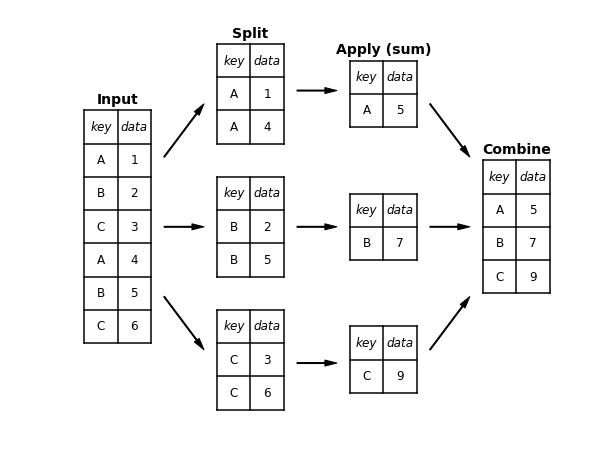

In [35]:
groupby_pic() # this function build at the end

In [36]:
df_friends = pd.DataFrame([['Chandler Bing','party','2017-08-04 08:00:00',51],
                           ['Chandler Bing','coffee','2017-08-04 13:00:00',60],
                           ['Chandler Bing','party','2017-08-04 15:00:00',59],
                           ['Chandler Bing','coffee','2017-08-04 16:00:00',40],
                           ['Joey Tribbiani','party','2017-08-04 09:00:00',54],
                           ['Joey Tribbiani','party','2017-08-04 10:00:00',67],
                           ['Joey Tribbiani','football','2017-08-04 08:00:00',84],
                           ['Gunther','work','2017-08-04 14:00:00']],
                           columns=['name','activity','timestamp','money_spent'])

df_friends['timestamp'] = pd.to_datetime(df_friends['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_friends

,name,activity,timestamp,money_spent
0,Chandler Bing,party,2017-08-04 08:00:00,51.0
1,Chandler Bing,coffee,2017-08-04 13:00:00,60.0
2,Chandler Bing,party,2017-08-04 15:00:00,59.0
3,Chandler Bing,coffee,2017-08-04 16:00:00,40.0
4,Joey Tribbiani,party,2017-08-04 09:00:00,54.0
5,Joey Tribbiani,party,2017-08-04 10:00:00,67.0
6,Joey Tribbiani,football,2017-08-04 08:00:00,84.0
7,Gunther,work,2017-08-04 14:00:00,NaN


In [37]:
## iter group
for index, group in df_friends.groupby(['name']):
    print('index: {}'.format(index))
    IPython.display.display(group)
    print()

index: Chandler Bing


,name,activity,timestamp,money_spent
0,Chandler Bing,party,2017-08-04 08:00:00,51.0
1,Chandler Bing,coffee,2017-08-04 13:00:00,60.0
2,Chandler Bing,party,2017-08-04 15:00:00,59.0
3,Chandler Bing,coffee,2017-08-04 16:00:00,40.0



index: Gunther


,name,activity,timestamp,money_spent
7,Gunther,work,2017-08-04 14:00:00,NaN



index: Joey Tribbiani


,name,activity,timestamp,money_spent
4,Joey Tribbiani,party,2017-08-04 09:00:00,54.0
5,Joey Tribbiani,party,2017-08-04 10:00:00,67.0
6,Joey Tribbiani,football,2017-08-04 08:00:00,84.0


### Aggregate
* `count()`:	Total number of items
* `first()`, `last()`:	First and last item
* `mean()`, `median()`:	Mean and median
* `min()`, `max()`:	Minimum and maximum
* `std()`, `var()`:	Standard deviation and variance
* `mad()`:	Mean absolute deviation
* `prod()`:	Product of all items
* `sum()`:	Sum of all items

In [38]:
display_df("df_friends.groupby(['name']).count()", 
           "df_friends.groupby(['name']).count().reset_index()")  # count() don't count the NaN

df_friends.groupby(['name']).count()
                activity  timestamp  money_spent
name                                            
Chandler Bing          4          4            4
Gunther                1          1            0
Joey Tribbiani         3          3            3

df_friends.groupby(['name']).count().reset_index()
             name  activity  timestamp  money_spent
0   Chandler Bing         4          4            4
1         Gunther         1          1            0
2  Joey Tribbiani         3          3            3

In [39]:
display_df("df_friends.groupby(['name', 'activity']).mean()", 
           "df_friends.groupby(['name', 'activity']).mean().reset_index()")

df_friends.groupby(['name', 'activity']).mean()
                         money_spent
name           activity             
Chandler Bing  coffee           50.0
               party            55.0
Gunther        work              NaN
Joey Tribbiani football         84.0
               party            60.5

df_friends.groupby(['name', 'activity']).mean().reset_index()
             name  activity  money_spent
0   Chandler Bing    coffee         50.0
1   Chandler Bing     party         55.0
2         Gunther      work          NaN
3  Joey Tribbiani  football         84.0
4  Joey Tribbiani     party         60.5

In [40]:
## add_suffix(), add_prefix()

display_df("df_friends.groupby(['name'])['money_spent'].agg([np.sum, np.mean, np.max])", 
           "df_friends.groupby(['name'])['money_spent'].agg([np.sum, np.mean, np.max]).add_suffix('_money').reset_index()")

df_friends.groupby(['name'])['money_spent'].agg([np.sum, np.mean, np.max])
                  sum       mean  amax
name                                  
Chandler Bing   210.0  52.500000  60.0
Gunther           0.0        NaN   NaN
Joey Tribbiani  205.0  68.333333  84.0

df_friends.groupby(['name'])['money_spent'].agg([np.sum, np.mean, np.max]).add_suffix('_money').reset_index()
             name  sum_money  mean_money  amax_money
0   Chandler Bing      210.0   52.500000        60.0
1         Gunther        0.0         NaN         NaN
2  Joey Tribbiani      205.0   68.333333        84.0

### Filter
filter the original DataFrame by group-condition

In [41]:
def filter_func(x):
    return x['money_spent'].mean() > 60

display_df("df_friends", "df_friends.groupby(['name']).filter(filter_func)")

,name,activity,timestamp,money_spent
0,Chandler Bing,party,2017-08-04 08:00:00,51.0
1,Chandler Bing,coffee,2017-08-04 13:00:00,60.0
2,Chandler Bing,party,2017-08-04 15:00:00,59.0
3,Chandler Bing,coffee,2017-08-04 16:00:00,40.0
4,Joey Tribbiani,party,2017-08-04 09:00:00,54.0
5,Joey Tribbiani,party,2017-08-04 10:00:00,67.0
6,Joey Tribbiani,football,2017-08-04 08:00:00,84.0
7,Gunther,work,2017-08-04 14:00:00,NaN
,name,activity,timestamp,money_spent
4,Joey Tribbiani,party,2017-08-04 09:00:00,54.0


### Apply

#### Use group result to calculate
not change the DF form

In [42]:
def centralize(x):
    x['money_centralize'] = x['money_spent'] - x['money_spent'].mean()
    return x

display_df("df_friends", "df_friends.groupby(['name']).apply(lambda x: centralize(x))")

df_friends
             name  activity           timestamp  money_spent
0   Chandler Bing     party 2017-08-04 08:00:00         51.0
1   Chandler Bing    coffee 2017-08-04 13:00:00         60.0
2   Chandler Bing     party 2017-08-04 15:00:00         59.0
3   Chandler Bing    coffee 2017-08-04 16:00:00         40.0
4  Joey Tribbiani     party 2017-08-04 09:00:00         54.0
5  Joey Tribbiani     party 2017-08-04 10:00:00         67.0
6  Joey Tribbiani  football 2017-08-04 08:00:00         84.0
7         Gunther      work 2017-08-04 14:00:00          NaN

df_friends.groupby(['name']).apply(lambda x: centralize(x))
             name  activity           timestamp  money_spent  money_centralize
0   Chandler Bing     party 2017-08-04 08:00:00         51.0         -1.500000
1   Chandler Bing    coffee 2017-08-04 13:00:00         60.0          7.500000
2   Chandler Bing     party 2017-08-04 15:00:00         59.0          6.500000
3   Chandler Bing    coffee 2017-08-04 16:00:00         40.0        -12.500000
4  Joey Tribbiani     party 2017-08-04 09:00:00         54.0        -14.333333
5  Joey Tribbiani     party 2017-08-04 10:00:00         67.0         -1.333333
6  Joey Tribbiani  football 2017-08-04 08:00:00         84.0         15.666667
7         Gunther      work 2017-08-04 14:00:00          NaN               NaN

####  Calculate and combine the same group
change the DF form

In [43]:
def coffee_money(df):
    df_coffee = df[df['activity']=='coffee']
    df_other = df[df['activity']!='coffee']
    return pd.Series([df.shape[0], 
                      df_coffee.shape[0], df_other.shape[0],
                      df_coffee['money_spent'].mean(), df_other['money_spent'].mean(),  
                      df_coffee['money_spent'].sum(), df_other['money_spent'].sum()], 
                      index=['total_count', 'coffee_count', 'other_count', 
                             'coffee_money_mean', 'other_money_mean',
                             'coffee_money_sum', 'other_money_sum'])

display_df("df_friends", "df_friends.groupby(['name']).apply(lambda x: coffee_money(x)).reset_index()")

df_friends
             name  activity           timestamp  money_spent
0   Chandler Bing     party 2017-08-04 08:00:00         51.0
1   Chandler Bing    coffee 2017-08-04 13:00:00         60.0
2   Chandler Bing     party 2017-08-04 15:00:00         59.0
3   Chandler Bing    coffee 2017-08-04 16:00:00         40.0
4  Joey Tribbiani     party 2017-08-04 09:00:00         54.0
5  Joey Tribbiani     party 2017-08-04 10:00:00         67.0
6  Joey Tribbiani  football 2017-08-04 08:00:00         84.0
7         Gunther      work 2017-08-04 14:00:00          NaN

df_friends.groupby(['name']).apply(lambda x: coffee_money(x)).reset_index()
             name  total_count  coffee_count  other_count  coffee_money_mean  \
0   Chandler Bing          4.0           2.0          2.0               50.0   
1         Gunther          1.0           0.0          1.0                NaN   
2  Joey Tribbiani          3.0           0.0          3.0                NaN   

   other_money_mean  coffee_money_sum  other_money_sum  
0         55.000000             100.0            110.0  
1               NaN               0.0              0.0  
2         68.333333               0.0            205.0

## Magic Commands (from IPython)
Usually use:
* `%time`: Time the execution of a single statement
* `%timeit`: Time repeated execution of a single statement for more accuracy
* `%prun`: Run code with the profiler
* `%lprun`: Run code with the line-by-line profiler
* `%memit`: Measure the memory use of a single statement
* `%mprun`: Run code with the line-by-line memory profiler

Note: `%`: line-magic, `%%`: cell-magic

In [44]:
## list all magic commands
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

## References
http://pandas.pydata.org/pandas-docs/stable    
https://jakevdp.github.io/PythonDataScienceHandbook  
https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9  
https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6  
https://gist.github.com/yong27/7869662  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# from:
# https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Split-Apply-Combine

def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None,
                   textstyle=None):
    loc = loc or [0, 0]
    width = width or 1

    x, y = loc

    if ax is None:
        ax = plt.gca()

    ncols = len(df.columns) + 1
    nrows = len(df.index) + 1

    dx = dy = width / ncols

    if linestyle is None:
        linestyle = {'color':'black'}

    if textstyle is None:
        textstyle = {'size': 12}

    textstyle.update({'ha':'center', 'va':'center'})

    # draw vertical lines
    for i in range(ncols + 1):
        plt.plot(2 * [x + i * dx], [y, y + dy * nrows], **linestyle)

    # draw horizontal lines
    for i in range(nrows + 1):
        plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

    # Create index labels
    for i in range(nrows - 1):
        plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
                 str(df.index[::-1][i]), **textstyle)

    # Create column labels
    for i in range(ncols - 1):
        plt.text(x + (i + 1.5) * dx, y + (nrows - 0.5) * dy,
                 str(df.columns[i]), style='italic', **textstyle)
        
    # Add index label
    if df.index.name:
        plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
                 str(df.index.name), style='italic', **textstyle)

    # Insert data
    for i in range(nrows - 1):
        for j in range(ncols - 1):
            plt.text(x + (j + 1.5) * dx,
                     y + (i + 0.5) * dy,
                     str(df.values[::-1][i, j]), **textstyle)


#----------------------------------------------------------
# Draw figure

import pandas as pd

def groupby_pic():
    df = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                       index=['A', 'B', 'C', 'A', 'B', 'C'])
    df.index.name = 'key'


    fig = plt.figure(figsize=(8, 6), facecolor='white')
    ax = plt.axes([0, 0, 1, 1])

    ax.axis('off')

    draw_dataframe(df, [0, 0])

    for y, ind in zip([3, 1, -1], 'ABC'):
        split = df[df.index == ind]
        draw_dataframe(split, [2, y])

        sum = pd.DataFrame(split.sum()).T
        sum.index = [ind]
        sum.index.name = 'key'
        sum.columns = ['data']
        draw_dataframe(sum, [4, y + 0.25])

    result = df.groupby(df.index).sum()
    draw_dataframe(result, [6, 0.75])

    style = dict(fontsize=14, ha='center', weight='bold')
    plt.text(0.5, 3.6, "Input", **style)
    plt.text(2.5, 4.6, "Split", **style)
    plt.text(4.5, 4.35, "Apply (sum)", **style)
    plt.text(6.5, 2.85, "Combine", **style)

    arrowprops = dict(facecolor='black', width=1, headwidth=6)
    plt.annotate('', (1.8, 3.6), (1.2, 2.8), arrowprops=arrowprops)
    plt.annotate('', (1.8, 1.75), (1.2, 1.75), arrowprops=arrowprops)
    plt.annotate('', (1.8, -0.1), (1.2, 0.7), arrowprops=arrowprops)

    plt.annotate('', (3.8, 3.8), (3.2, 3.8), arrowprops=arrowprops)
    plt.annotate('', (3.8, 1.75), (3.2, 1.75), arrowprops=arrowprops)
    plt.annotate('', (3.8, -0.3), (3.2, -0.3), arrowprops=arrowprops)

    plt.annotate('', (5.8, 2.8), (5.2, 3.6), arrowprops=arrowprops)
    plt.annotate('', (5.8, 1.75), (5.2, 1.75), arrowprops=arrowprops)
    plt.annotate('', (5.8, 0.7), (5.2, -0.1), arrowprops=arrowprops)

    plt.axis('equal')
    plt.ylim(-1.5, 5)
    plt.show()